In [1]:
import numpy as np
np.set_printoptions(suppress=True)
from scipy import misc
from scipy.ndimage import convolve
from scipy import fftpack
import cv2
from collections import Counter
from skimage.exposure import match_histograms
import matplotlib.pyplot as plt
from skimage import io
import warnings
warnings.filterwarnings("ignore")
from scipy.ndimage import gaussian_filter
import math

/home/ziyaad/.local/lib/python3.8/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 8.1.2. Several security issues (CVE-2021-27921, CVE-2021-25290, CVE-2021-25291, CVE-2021-25293, and more) have been fixed in pillow 8.1.2 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


In [2]:
def Cal2DDTF(im):
    F=fftpack.fft2(im)
    Fc=fftpack.fftshift(F)
    return F,Fc

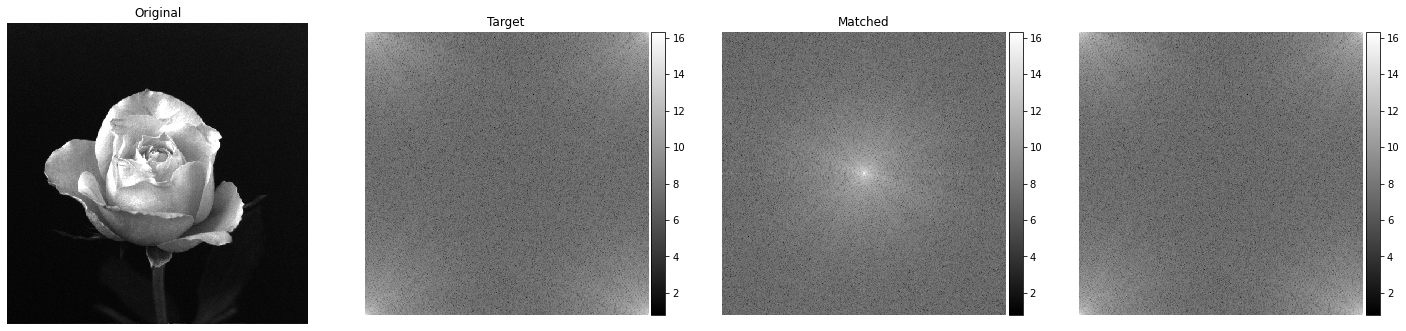

In [3]:
rose=cv2.imread("rose512.tif",0)
F,Fc=Cal2DDTF(rose)
S=np.abs(F)


fig,ax = plt.subplots(nrows = 1,ncols=4,figsize = (20,20))
plt.subplot(1,4,1),io.imshow(rose),ax[0].set_title("Original")
plt.subplot(1,4,2),io.imshow(np.log(np.abs(F)), cmap='gray'),ax[1].set_title("Target")
plt.subplot(1,4,3),io.imshow(np.log(np.abs(Fc)),cmap='gray'),ax[2].set_title("Matched")
plt.subplot(1,4,4),io.imshow(np.log(np.abs(S)),cmap='gray'),ax[2].set_title("Matched")
for a in ax:
    a.axis('off')

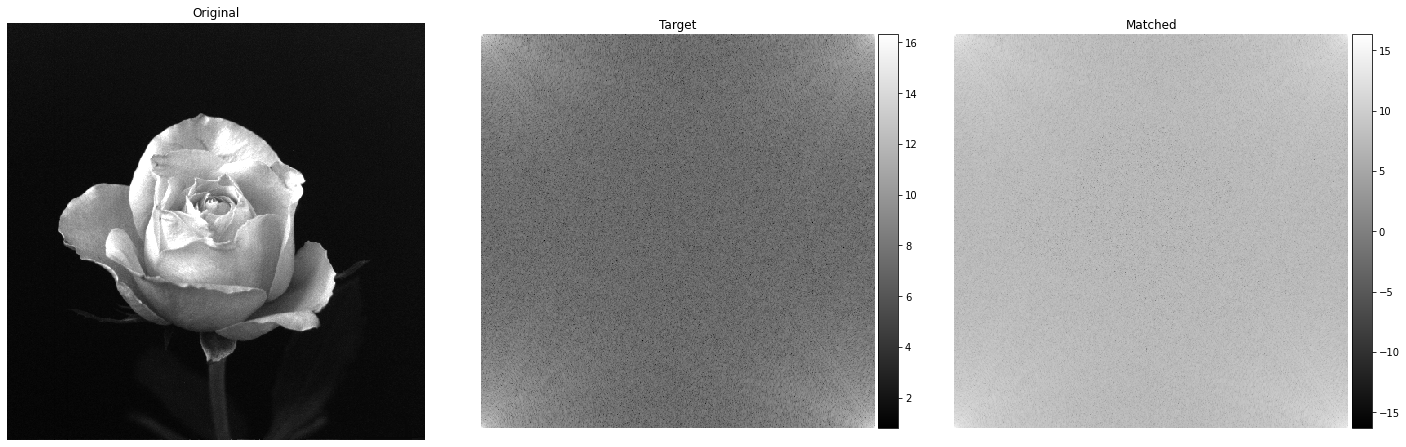

In [6]:
I=F.imag
R=S.real
Diff=rose-R
fig,ax = plt.subplots(nrows = 1,ncols=3,figsize = (20,20))
plt.subplot(1,3,1),io.imshow(rose),ax[0].set_title("Original")
plt.subplot(1,3,2),io.imshow(np.log(np.abs(R)), cmap='gray'),ax[1].set_title("Target")
plt.subplot(1,3,3),io.imshow(np.log(np.abs(Diff)),cmap='gray'),ax[2].set_title("Matched")
for a in ax:
    a.axis('off')

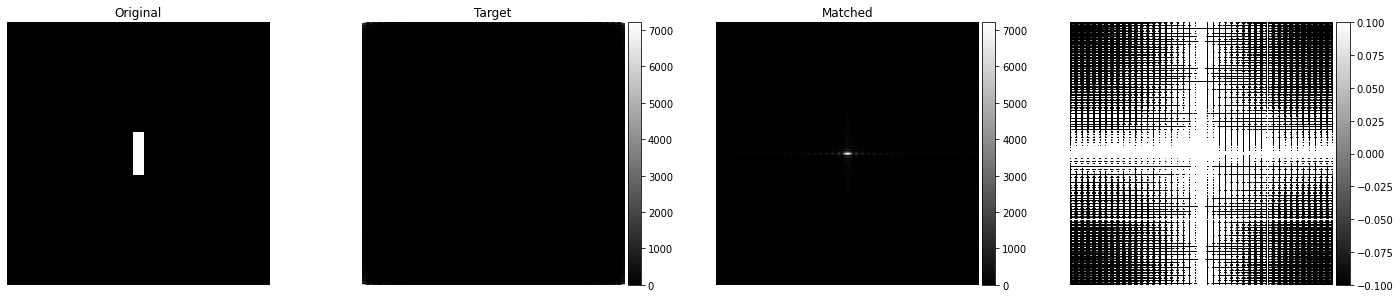

In [22]:
rect=np.zeros((1024,1024))
for i in range(490,534):
    for k in range(430,594):
        rect[k][i]=1

F,Fc=Cal2DDTF(rect)

fig,ax = plt.subplots(nrows = 1,ncols=4,figsize = (20,20))
plt.subplot(1,4,1),io.imshow(rect, cmap='gray'),ax[0].set_title("Original")
plt.subplot(1,4,2),io.imshow(np.abs(F), cmap='gray'),ax[1].set_title("Target")
plt.subplot(1,4,3),io.imshow(np.abs(Fc),cmap='gray'),ax[2].set_title("Matched")
plt.subplot(1,4,4),io.imshow(np.log(np.abs(Fc)),cmap='gray'),ax[2].set_title("Matched")
for a in ax:
    a.axis('off')

In [6]:
def CalcPhaseAng(im):
    F,Fc=Cal2DDTF(im)
    I=F.imag
    R=F.real
    phi=np.arctan2(I,R)
    return phi,F,Fc

(<AxesSubplot:>,
 Text(0.5, 1.0, 'Matched'))

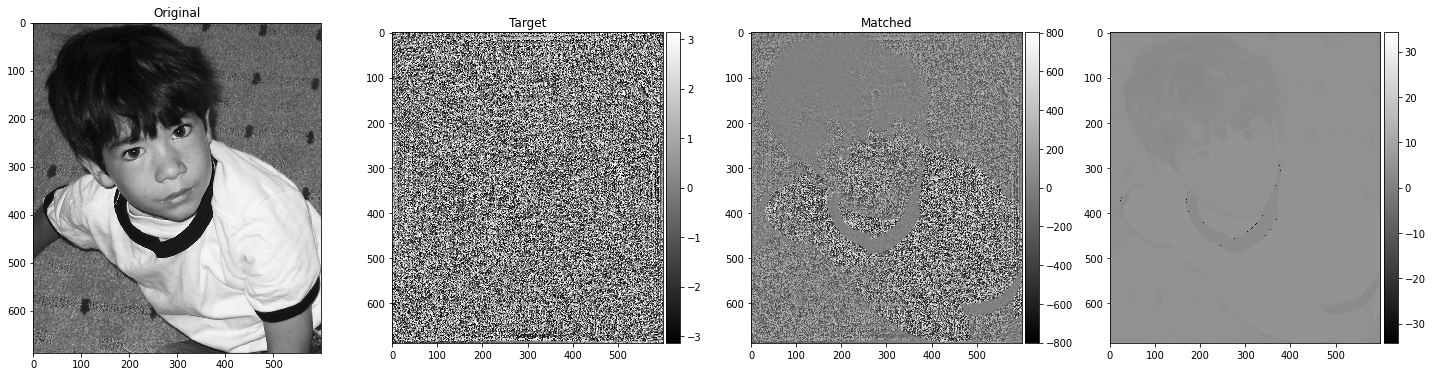

In [7]:
boy=cv2.imread("boy.tif",0)
PA,F,Fc=CalcPhaseAng(boy)
boyPa=PA*boy
boyF=boy*F
inv=np.fft.ifft2(F)



# Rf,RFc=Cal2DDTF(rect)

# RectSpect=boyF*Rf

fig,ax = plt.subplots(nrows = 1,ncols=4,figsize = (20,20))
plt.subplot(1,4,1),io.imshow(boy),ax[0].set_title("Original")
plt.subplot(1,4,2),io.imshow(PA, cmap='gray'),ax[1].set_title("Target")
plt.subplot(1,4,3),io.imshow(boyPa,cmap='gray'),ax[2].set_title("Matched")
plt.subplot(1,4,4),io.imshow(np.log(np.abs(inv)),cmap='gray'),ax[2].set_title("Matched")

In [ ]:
dip=cv2.imread("DIP.tif",0)
